In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [5]:
scaler = StandardScaler()

In [6]:
X_scaled = scaler.fit_transform(X)

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0,init='k-means++')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


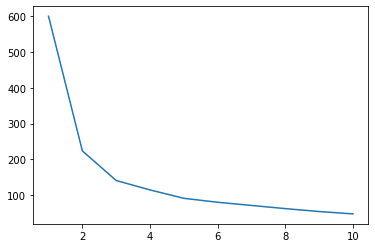

In [8]:
plt.plot(range(1,11),wcss)

In [9]:
kmeans = KMeans(n_clusters=3,random_state=0,init="k-means++")
kmeans.fit(X_scaled)

df["Cluster"] = kmeans.labels_

In [10]:
silhouette_score(X_scaled,kmeans.labels_)

0.4589717867018717